In [264]:
#1 (1)
import pandas
dataSource = pandas.read_csv('weight-height.csv')

In [265]:
#2 (1)
data = dataSource
data['Height'] = dataSource['Height'].multiply(2.54)
data['Weight'] = dataSource['Weight'].multiply(0.45359237)
print(data.head())

  Gender      Height      Weight
0   Male  187.571423  109.721075
1   Male  174.706036   73.622792
2   Male  188.239668   96.497629
3   Male  182.196685   99.809586
4   Male  177.499761   93.598695


Text(0.5, 1.0, 'Weight vs. Height by Gender')

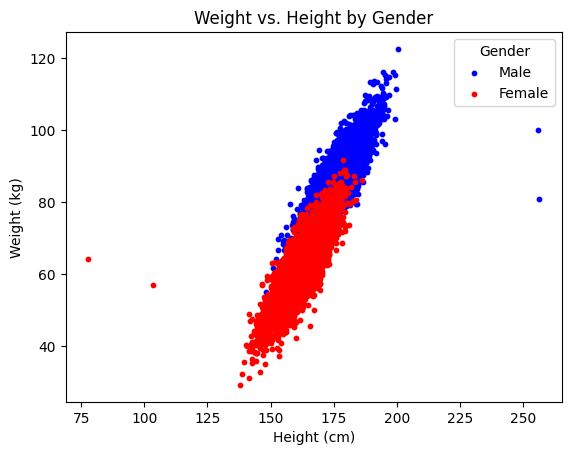

In [266]:
#3 (2)
import matplotlib.pyplot as plt
plt.scatter(data[data['Gender'] == 'Male']['Height'], data[data['Gender'] == 'Male']['Weight'], 10, 'blue', label='Male')
plt.scatter(data[data['Gender'] == 'Female']['Height'], data[data['Gender'] == 'Female']['Weight'], 10, 'red', label='Female')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Gender')
plt.title('Weight vs. Height by Gender')

In [267]:
#4 (2)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data['Height'].to_numpy().reshape(-1, 1), data['Weight'])
print(f'w1 = {reg.coef_[0]}')
print(f'w0 = {reg.intercept_}')

w1 = 1.3440958343319354
w0 = -153.3519860587032


In [268]:
#5 (1)

# n = np.size(x)
numRow = len(data)
x = data['Height'].to_numpy()
y = data['Weight'].to_numpy()
w1 = (sum(x*y) - (1/numRow)*sum(x)*sum(y))/(sum(x**2) - (1/numRow)*(sum(x))**2)
w0 = (1/numRow)*sum(y)-w1*(1/numRow)*sum(x)
print(f'w1 = {w1}')
print(f'w0 = {w0}')

w1 = 1.344095834333103
w0 = -153.35198605890014


Text(0.5, 1.0, 'Weight vs. Height by Gender')

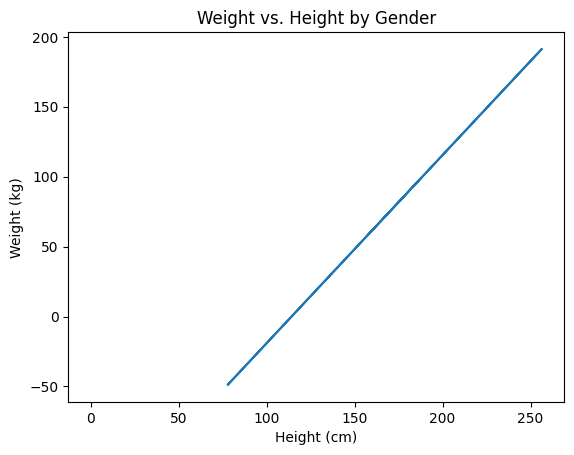

In [269]:
#6 (1)
y_pred = reg.coef_[0]*data['Height'].to_numpy() + reg.intercept_
plt.plot(data['Height'], y_pred, 10)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Weight vs. Height by Gender')

In [270]:
#7 (1.5)
# Tính sai số của từng điểm dữ liệu
data['Predicted'] = w0 + w1 * data['Height'] # Giá trị dự đoán: y^ = xw  
data['Residual'] = abs(data['Weight'] - data['Predicted'])  # Sai số tuyệt đối: ei = yi - y^i

# Sắp xếp theo giá trị sai số giảm dần
data_sorted = data.sort_values(by='Residual', ascending=False)

# Xác định số lượng điểm dữ liệu nhiễu cần loại bỏ
percent_to_remove = 0.1 # 10%
num_points_to_remove = int(len(data_sorted) * percent_to_remove)

# Lấy ra các điểm dữ liệu nhiễu
outliers = data_sorted.head(num_points_to_remove)

# In ra các điểm dữ liệu nhiễu
print("Top 10% data points with highest residuals:")
print(outliers[['Height', 'Weight', 'Gender', 'Residual']])

Top 10% data points with highest residuals:
          Height      Weight  Gender    Residual
7533   77.719875   64.173173  Female  113.062199
2862  256.446957   80.989458    Male  110.347842
67    255.944040  100.097876    Male   90.563456
7675  103.490868   56.902502  Female   71.152844
7821  165.768177   45.805073  Female   23.651258
...          ...         ...     ...         ...
8301  171.916362   68.619478  Female    9.100601
4791  168.106281   81.697456    Male    9.098490
6135  165.429002   59.903121  Female    9.097325
9140  163.426412   57.211498  Female    9.097276
7665  158.307115   50.332203  Female    9.095745

[1000 rows x 4 columns]


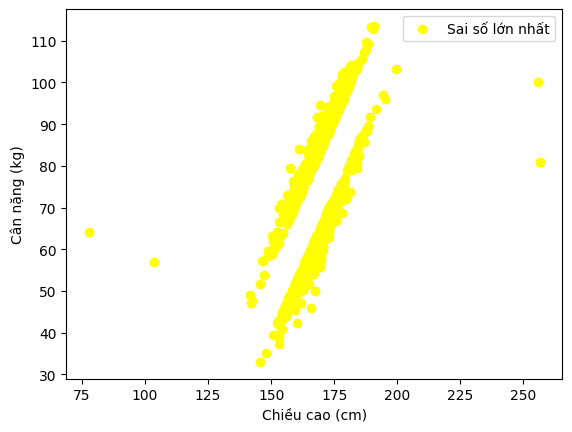

In [271]:
#8 (0.5)
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.scatter(outliers['Height'], outliers['Weight'], color='yellow', label='Sai số lớn nhất')
plt.legend()
plt.show()